In [1]:
import pandas as pd
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
data = {
    'Client_ID': range(1, 101),
    'Age': np.random.randint(18, 70, 100),
    'Income': np.random.randint(30000, 120000, 100),
    'Investment_Experience': np.random.randint(0, 10, 100),  # Years of experience
    'Risk_Tolerance': np.random.choice(['Low', 'Medium', 'High'], 100),
    'Investment_Amount': np.random.randint(5000, 50000, 100),
    'Financial_GOAL': np.random.choice(['Retirement', 'Education', 'Buying Home', 'Travel'], 100),
    'Returns': np.random.uniform(-0.1, 0.3, 100)  # Annual returns
}

df = pd.DataFrame(data)
df.to_csv('financial_advisory_dataset.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client_ID              100 non-null    int64  
 1   Age                    100 non-null    int64  
 2   Income                 100 non-null    int64  
 3   Investment_Experience  100 non-null    int64  
 4   Risk_Tolerance         100 non-null    object 
 5   Investment_Amount      100 non-null    int64  
 6   Financial_GOAL         100 non-null    object 
 7   Returns                100 non-null    float64
dtypes: float64(1), int64(5), object(2)
memory usage: 6.4+ KB
None
        Client_ID         Age         Income  Investment_Experience  \
count  100.000000  100.000000     100.000000              100.00000   
mean    50.500000   43.350000   75544.160000                3.79000   
std     29.011492   14.904663   25841.710202                2.85436   
min      1.000000   19.000

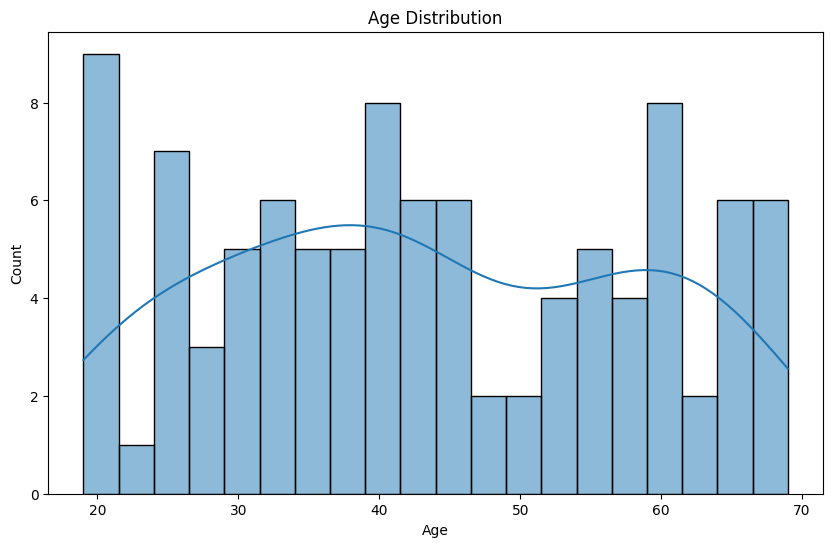

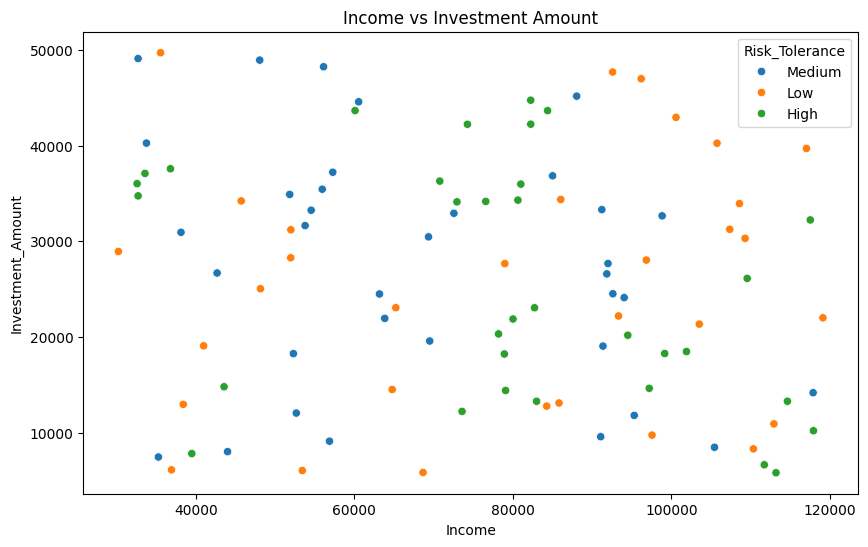

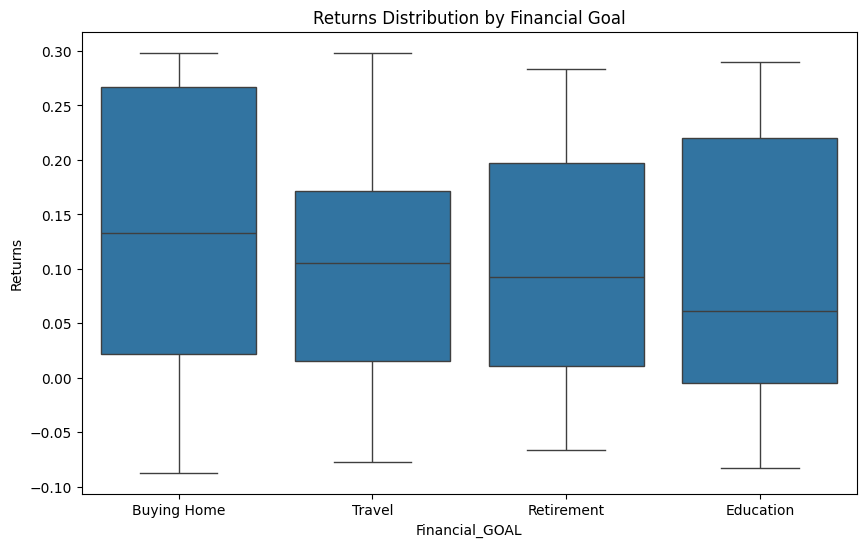

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('financial_advisory_dataset.csv')

# Display basic information
print(df.info())
print(df.describe())

# Plot distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

# Plot Income vs Investment Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Investment_Amount', hue='Risk_Tolerance', data=df)
plt.title('Income vs Investment Amount')
plt.show()

# Plot Returns distribution by Financial Goal
plt.figure(figsize=(10, 6))
sns.boxplot(x='Financial_GOAL', y='Returns', data=df)
plt.title('Returns Distribution by Financial Goal')
plt.show()


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
le_risk = LabelEncoder()
df['Risk_Tolerance'] = le_risk.fit_transform(df['Risk_Tolerance'])
le_goal = LabelEncoder()
df['Financial_GOAL'] = le_goal.fit_transform(df['Financial_GOAL'])

# Prepare data
X = df[['Age', 'Income', 'Investment_Experience', 'Investment_Amount', 'Risk_Tolerance']]
y = df['Returns']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=8, validation_split=0.2)


Epoch 1/20
8/8 [==============================] - 1s 46ms/step - loss: 272695392.0000 - val_loss: 65351288.0000
Epoch 2/20
8/8 [==============================] - 0s 8ms/step - loss: 120632448.0000 - val_loss: 5027611.5000
Epoch 3/20
8/8 [==============================] - 0s 8ms/step - loss: 82361232.0000 - val_loss: 14137090.0000
Epoch 4/20
8/8 [==============================] - 0s 18ms/step - loss: 68442376.0000 - val_loss: 6706298.0000
Epoch 5/20
8/8 [==============================] - 0s 17ms/step - loss: 49731032.0000 - val_loss: 1614691.5000
Epoch 6/20
8/8 [==============================] - 0s 18ms/step - loss: 30138180.0000 - val_loss: 3801332.5000
Epoch 7/20
8/8 [==============================] - 0s 22ms/step - loss: 46974180.0000 - val_loss: 2815239.7500
Epoch 8/20
8/8 [==============================] - 0s 21ms/step - loss: 37559224.0000 - val_loss: 1567163.0000
Epoch 9/20
8/8 [==============================] - 0s 21ms/step - loss: 27877762.0000 - val_loss: 4353045.0000
Epoch 10

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Normalize data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for LSTM
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Define LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_scaled.shape[1], X_scaled.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_scaled, y, epochs=10, batch_size=8, validation_split=0.2)


Epoch 1/10
10/10 [==============================] - 2s 49ms/step - loss: 0.0292 - val_loss: 0.0070
Epoch 2/10
10/10 [==============================] - 0s 16ms/step - loss: 0.0201 - val_loss: 0.0081
Epoch 3/10
10/10 [==============================] - 0s 12ms/step - loss: 0.0147 - val_loss: 0.0121
Epoch 4/10
10/10 [==============================] - 0s 22ms/step - loss: 0.0132 - val_loss: 0.0161
Epoch 5/10
10/10 [==============================] - 0s 18ms/step - loss: 0.0132 - val_loss: 0.0177
Epoch 6/10
10/10 [==============================] - 0s 11ms/step - loss: 0.0130 - val_loss: 0.0175
Epoch 7/10
10/10 [==============================] - 0s 12ms/step - loss: 0.0129 - val_loss: 0.0157
Epoch 8/10
10/10 [==============================] - 0s 11ms/step - loss: 0.0127 - val_loss: 0.0152
Epoch 9/10
10/10 [==============================] - 0s 15ms/step - loss: 0.0127 - val_loss: 0.0164
Epoch 10/10
10/10 [==============================] - 0s 11ms/step - loss: 0.0126 - val_loss: 0.0158
